# **Predicción de Evasión (Churn) de Clientes de Empresa Telecom X**

En el siguiente proyecto se utilizarán modelos predictivos para poder estimar los clientes con mayor probabilidad de cancelar los servicios.

# A.Preparación de los Datos

## 1.Carga del Archivo tratado en Desafío TelecomX

In [1]:
# Clonar Repositorio github con los datos
!git clone https://github.com/smv1980/telecomX2.git

Cloning into 'telecomX2'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 304.63 KiB | 1.29 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import pandas as pd

df = pd.read_csv('/content/telecomX2/datos_tratados.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## 2.Preprocesamiento de los datos

Se revisan nuevamente los parámetros de los datos por valores nulos y duplicados.

In [3]:
# Análisis Preliminar
print(f'Total de Registros (filas): {df.shape[0]}')
print(f'Total de Variables (Columnas): {df.shape[1]}')
print(f'Nombres de las Variables: {df.columns.tolist()}')
print(f'Cantidad de Valores Nulos: {sum(df.isnull().sum())}')
print(f'Cantidad de Valores Duplicados: {df.duplicated().sum()}')

Total de Registros (filas): 7044
Total de Variables (Columnas): 22
Nombres de las Variables: ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']
Cantidad de Valores Nulos: 33
Cantidad de Valores Duplicados: 0


### A. Revisión números nulos

In [4]:
# Función para encontrar coordenadas de valores nulos
def mostrar_coordenadas_nulos_compacto(df):
    import numpy as np
    nulos = df.isnull()
    filas, columnas = np.where(nulos)
    return list(zip(nulos.index[filas], nulos.columns[columnas]))

In [5]:
mostrar_coordenadas_nulos_compacto(df)

[(945, 'account.Charges.Total'),
 (1731, 'account.Charges.Total'),
 (1906, 'account.Charges.Total'),
 (2025, 'account.Charges.Total'),
 (2176, 'account.Charges.Total'),
 (2250, 'account.Charges.Total'),
 (2855, 'account.Charges.Total'),
 (3052, 'account.Charges.Total'),
 (3118, 'account.Charges.Total'),
 (4054, 'account.Charges.Total'),
 (5433, 'account.Charges.Total'),
 (7043, 'customerID'),
 (7043, 'Churn'),
 (7043, 'customer.gender'),
 (7043, 'customer.SeniorCitizen'),
 (7043, 'customer.Partner'),
 (7043, 'customer.Dependents'),
 (7043, 'customer.tenure'),
 (7043, 'phone.PhoneService'),
 (7043, 'phone.MultipleLines'),
 (7043, 'internet.InternetService'),
 (7043, 'internet.OnlineSecurity'),
 (7043, 'internet.OnlineBackup'),
 (7043, 'internet.DeviceProtection'),
 (7043, 'internet.TechSupport'),
 (7043, 'internet.StreamingTV'),
 (7043, 'internet.StreamingMovies'),
 (7043, 'account.Contract'),
 (7043, 'account.PaperlessBilling'),
 (7043, 'account.PaymentMethod'),
 (7043, 'account.Charge

In [6]:
# Eliminar fila con valor nulo
df.dropna(inplace=True)

# Comprobación
print(f'Total de Registros (filas): {df.shape[0]}')
print(f'Cantidad de Valores Nulos: {sum(df.isnull().sum())}')

Total de Registros (filas): 7032
Cantidad de Valores Nulos: 0


### B. Tratamiento de Variables Categóricas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   float64
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   float64
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [8]:
# Reasignando tipo de variables categóricas
cat_col_positions = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18]

for pos in cat_col_positions:
    col_name = df.columns[pos]
    df[col_name] = df[col_name].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7032 non-null   object  
 1   Churn                      7032 non-null   category
 2   customer.gender            7032 non-null   category
 3   customer.SeniorCitizen     7032 non-null   category
 4   customer.Partner           7032 non-null   category
 5   customer.Dependents        7032 non-null   category
 6   customer.tenure            7032 non-null   float64 
 7   phone.PhoneService         7032 non-null   category
 8   phone.MultipleLines        7032 non-null   category
 9   internet.InternetService   7032 non-null   category
 10  internet.OnlineSecurity    7032 non-null   category
 11  internet.OnlineBackup      7032 non-null   category
 12  internet.DeviceProtection  7032 non-null   category
 13  internet.TechSupport       7032 non-nu

### C. Eliminación de Columnas Irrelevantes

Se eliminina la columna customerID porque no contiene datos que aporten al análisis.

In [10]:
df.drop(columns=['customerID'], inplace=True)
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## 3.Categorical and Numerical

Se separan las variables en categóricas y numéricas para su encoding y escalado.

In [11]:
# Separar Variables numéricas y categóricas
X_categoricals=df.select_dtypes(include='category')

X_numericals = df.select_dtypes(include=["number"])

## 4.Encoding (Dummies)

Se procede al encoding mediante variables dummies de las variables categóricas.

In [12]:
df_encoded = pd.get_dummies(X_categoricals, columns=X_categoricals.columns, drop_first=True).reset_index(drop=True)
df_encoded.head()

,Churn_Yes,customer.gender_Male,customer.SeniorCitizen_1.0,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,internet.InternetService_Fiber optic,internet.InternetService_No,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,False,False,False,True,True,True,False,False,False,False,...,False,True,False,False,True,False,True,False,False,True
1,False,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,True,True,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,True,True,True,True,False,True,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,True,False,True,True,False,True,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True


## 5.Normalización o Estándarización

Se procede a estandarizar las variables numéricas.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numericals)

X_scaled= pd.DataFrame(X_scaled, columns=X_numericals.columns).reset_index(drop=True)
X_scaled.head()

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,-0.954296,0.026652,-0.745607,0.026652
1,-0.954296,-0.162819,-0.768063,-0.162819
2,-1.158016,0.302548,-0.883456,0.302548
3,-0.791321,1.103642,-0.461240,1.103642
4,-1.198760,0.634952,-0.889390,0.634952


In [14]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer.tenure          7032 non-null   float64
 1   account.Charges.Monthly  7032 non-null   float64
 2   account.Charges.Total    7032 non-null   float64
 3   Cuentas_Diarias          7032 non-null   float64
dtypes: float64(4)
memory usage: 219.9 KB


## 6.Dataframe Escalado y Estandarizado

Se procede a juntar todas las variables predictoras (ya escaladas y con el endoding) en un solo dataframe para su posterior uso.

In [15]:
df_2 = pd.concat([df_encoded,X_scaled], axis=1).reset_index(drop=True)
df_2

,Churn_Yes,customer.gender_Male,customer.SeniorCitizen_1.0,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,internet.InternetService_Fiber optic,internet.InternetService_No,...,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,False,False,False,True,True,True,False,False,False,False,...,True,False,True,False,False,True,-0.954296,0.026652,-0.745607,0.026652
1,False,True,False,False,False,True,False,True,False,False,...,False,False,False,False,False,True,-0.954296,-0.162819,-0.768063,-0.162819
2,True,True,False,False,False,True,False,False,True,False,...,False,False,True,False,True,False,-1.158016,0.302548,-0.883456,0.302548
3,True,True,True,True,False,True,False,False,True,False,...,False,False,True,False,True,False,-0.791321,1.103642,-0.461240,1.103642
4,True,False,True,True,False,True,False,False,True,False,...,False,False,True,False,False,True,-1.198760,0.634952,-0.889390,0.634952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,-0.791321,-0.320711,-0.679605,-0.320711
7028,True,True,False,True,False,True,False,True,True,False,...,False,False,True,False,True,False,-0.424625,0.674841,-0.180711,0.674841
7029,False,True,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,-1.239504,-0.481927,-0.966443,-0.481927
7030,False,True,False,True,True,True,False,False,False,False,...,False,True,False,False,False,True,1.408853,0.101443,1.034298,0.101443


# B.Análisis Exploratorio

## 1.Verificación de la Proporción de Cancelación (Churn)

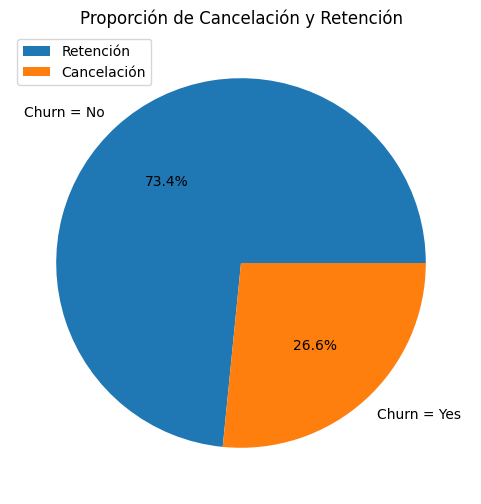

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot.pie(labels=['Churn = No', 'Churn = Yes'],autopct='%1.1f%%')
plt.title('Proporción de Cancelación y Retención')
plt.ylabel('')
plt.legend(['Retención', 'Cancelación'], loc='upper left')
plt.show()

Existe un desbalance entre las clases, lo que puede impactar en los modelos predictivos y análisis de los resultados. Es por esto que se procederá a balancear el set de entrenamiento previo a la aplicación de los modelos predictivos.


## 2.Monto Total de la Evasión

In [17]:
evasion_monto=df.groupby('Churn')['account.Charges.Total'].sum().reset_index()
monto_evasion = evasion_monto.loc[evasion_monto['Churn'] == 'Yes', 'account.Charges.Total'].values[0]
print(f"\033[1mEl monto total de la evasión es de $ {monto_evasion:,.2f}\033[0m")

El monto total de la evasión es de $ 2,862,926.90


/tmp/ipython-input-4131965534.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasion_monto=df.groupby('Churn')['account.Charges.Total'].sum().reset_index()


## 3.Análisis Dirigido

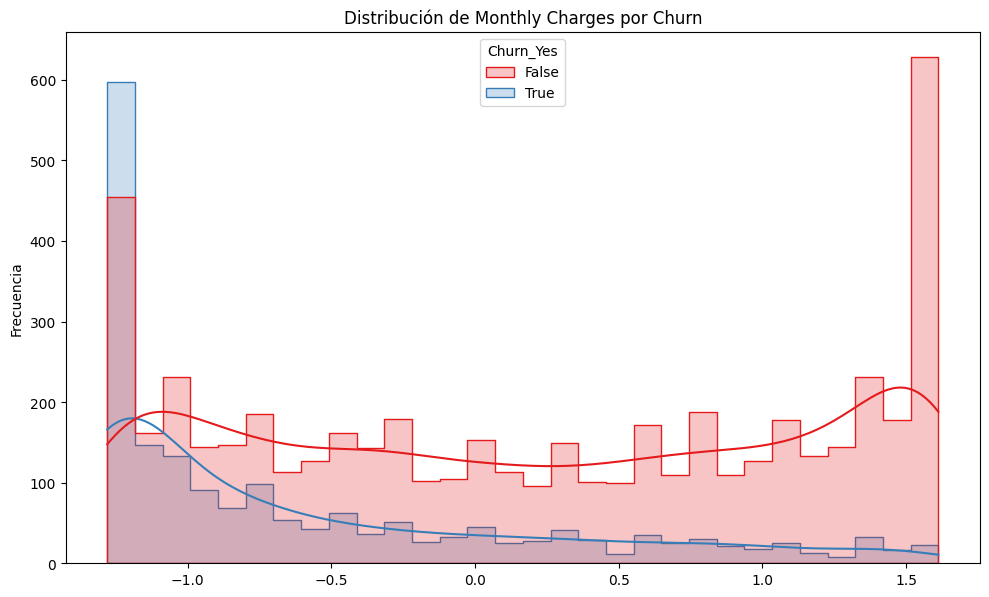

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Crear layout con 2 filas
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Histograma
ax0 = plt.subplot(gs[0])
sns.histplot(data=df_2, x='customer.tenure', hue='Churn_Yes',
             bins=30, kde=True, palette='Set1', element='step', ax=ax0)
ax0.set_title('Distribución de Monthly Charges por Churn')
ax0.set_xlabel('')
ax0.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

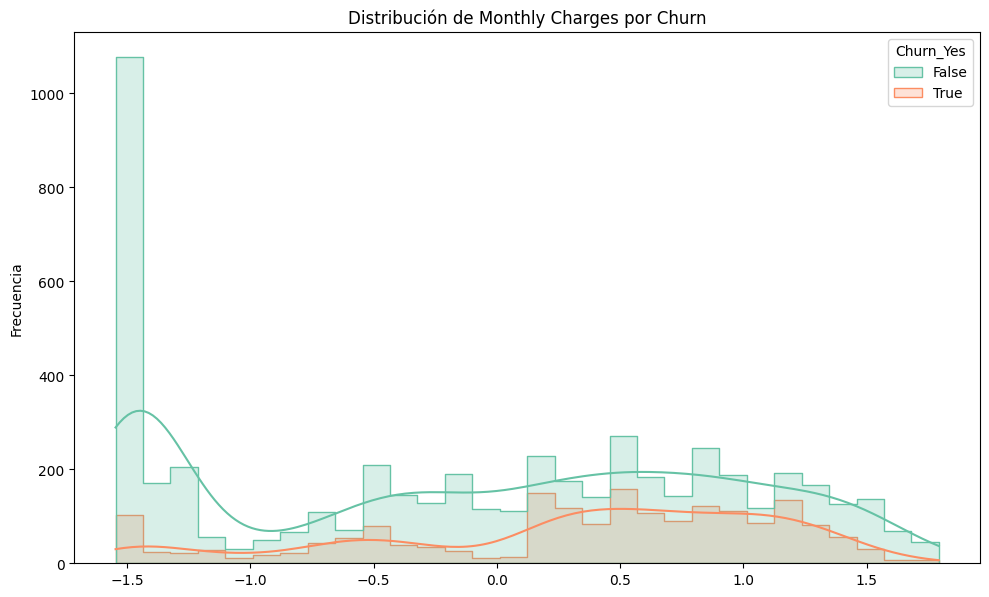

In [52]:
# Crear layout con 2 filas
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Histograma
ax0 = plt.subplot(gs[0])
sns.histplot(data=df_2, x='account.Charges.Monthly', hue='Churn_Yes',
             bins=30, kde=True, palette='Set2', element='step', ax=ax0)
ax0.set_title('Distribución de Monthly Charges por Churn')
ax0.set_xlabel('')
ax0.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

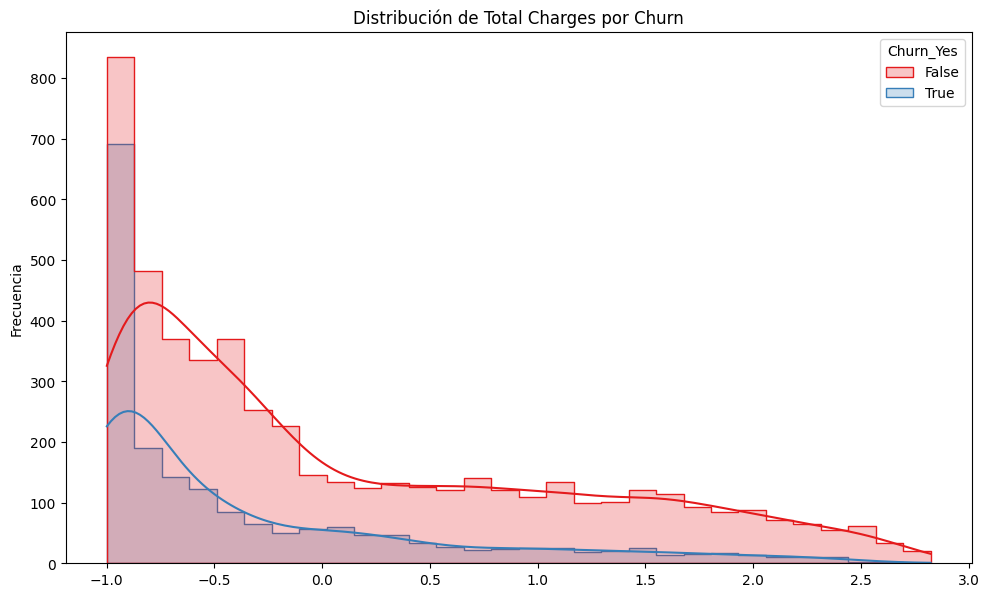

In [53]:
# Crear layout con 2 filas
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Histograma
ax0 = plt.subplot(gs[0])
sns.histplot(data=df_2, x='account.Charges.Total', hue='Churn_Yes',
             bins=30, kde=True, palette='Set1', element='step', ax=ax0)
ax0.set_title('Distribución de Total Charges por Churn')
ax0.set_xlabel('')
ax0.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

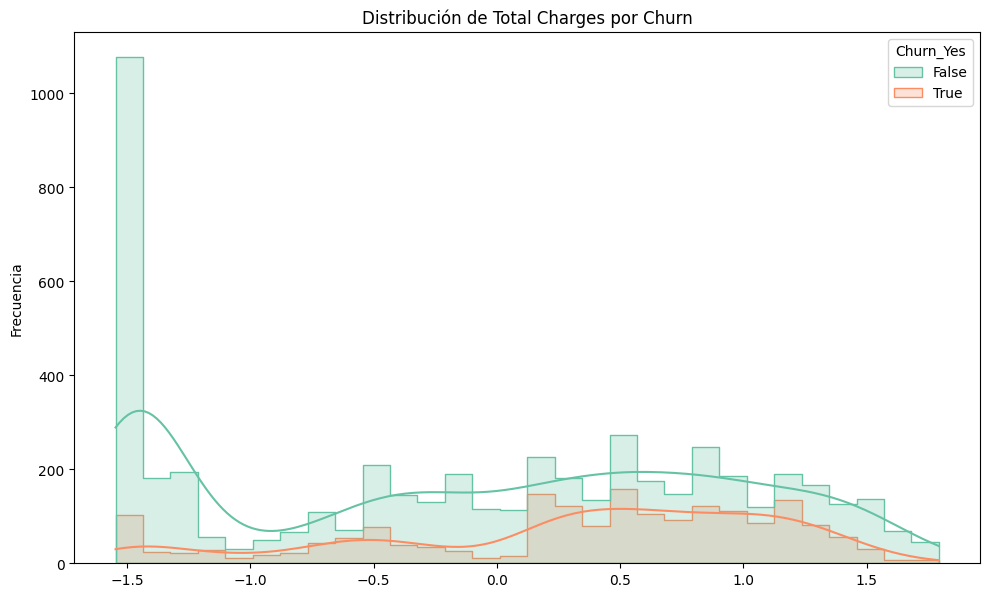

In [54]:
# Crear layout con 2 filas
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Histograma
ax0 = plt.subplot(gs[0])
sns.histplot(data=df_2, x='Cuentas_Diarias', hue='Churn_Yes',
             bins=30, kde=True, palette='Set2', element='step', ax=ax0)
ax0.set_title('Distribución de Total Charges por Churn')
ax0.set_xlabel('')
ax0.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# C.Correlación y Selección de Variables

## 1.Análisis de Correlación

In [22]:
X_numericals = df_2[['customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_Diarias']]

X_numericals.corr().round(4)

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
customer.tenure,1.0000,0.2469,0.8259,0.2469
account.Charges.Monthly,0.2469,1.0000,0.6511,1.0000
account.Charges.Total,0.8259,0.6511,1.0000,0.6511
Cuentas_Diarias,0.2469,1.0000,0.6511,1.0000


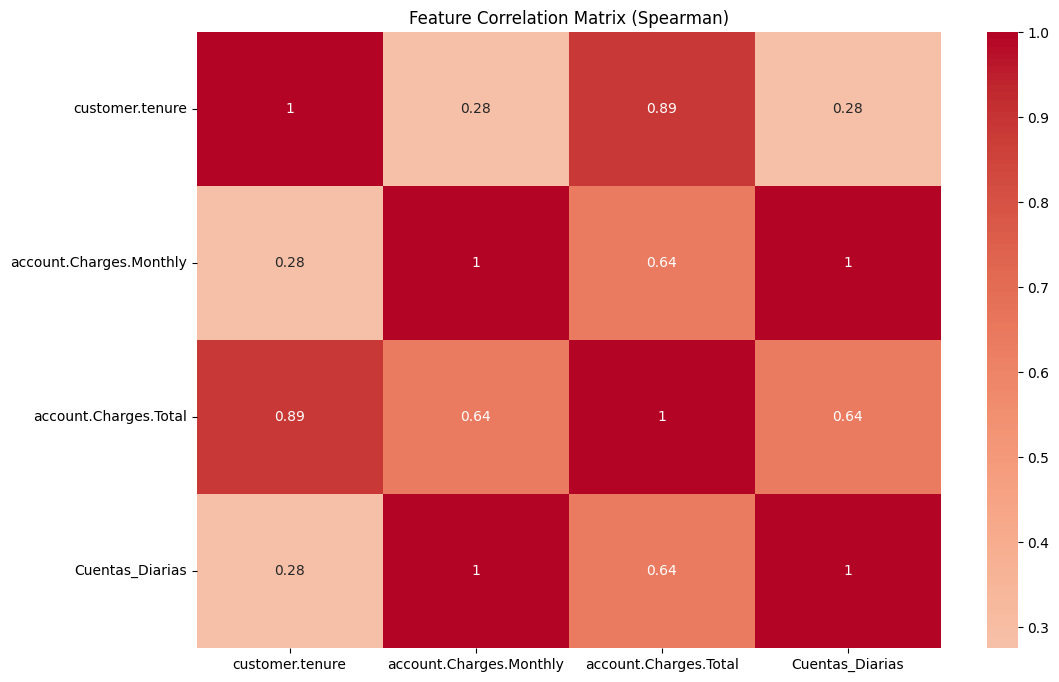

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(X_numericals.corr(method='spearman'), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Spearman)')
plt.show()

# D.Balanceo de Clases

Se procede a realizar undersampling (reduciendo la clase mayoritaria) con la técnica NearMiss en el set de entrenamiento.

## 1.Separación de Datos

In [24]:
from sklearn.model_selection import train_test_split

X = df_2.drop(columns=['Churn_Yes'])
y = df_2['Churn_Yes']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## 2.Undersampling

In [26]:
import imblearn as imb
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_train, y_train = nm.fit_resample(X_train, y_train)

In [27]:
X_train.shape

(2616, 31)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.gender_Male                           2616 non-null   bool   
 1   customer.SeniorCitizen_1.0                     2616 non-null   bool   
 2   customer.Partner_Yes                           2616 non-null   bool   
 3   customer.Dependents_Yes                        2616 non-null   bool   
 4   phone.PhoneService_Yes                         2616 non-null   bool   
 5   phone.MultipleLines_No phone service           2616 non-null   bool   
 6   phone.MultipleLines_Yes                        2616 non-null   bool   
 7   internet.InternetService_Fiber optic           2616 non-null   bool   
 8   internet.InternetService_No                    2616 non-null   bool   
 9   internet.OnlineSecurity_No internet service    2616 

In [29]:
# Tratamiento de Variables categóricas
bool_cols = X_train.select_dtypes(include='bool').columns
X_train[bool_cols] = X_train[bool_cols].astype('category')
y_train = y_train.astype('category')

In [30]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2616 entries, 0 to 2615
Series name: Churn_Yes
Non-Null Count  Dtype   
--------------  -----   
2616 non-null   category
dtypes: category(1)
memory usage: 2.8 KB


# E.Modelado Predictivo

## 2.Creación de Modelos

### A.Regresión Logística

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# 3. Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000, solver='liblinear')  # solver para datos no muy grandes
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [32]:
# 4. Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para ROC AUC

### B. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# 4. Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
# 5. Predicción
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

## 3.Evaluación de los Modelos

### A. Regresión Logística

In [35]:
# 5. Evaluación
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.59      0.71      1549
        True       0.41      0.80      0.54       561

    accuracy                           0.64      2110
   macro avg       0.65      0.69      0.63      2110
weighted avg       0.76      0.64      0.66      2110

Confusion Matrix:
 [[908 641]
 [111 450]]
ROC AUC: 0.7586241022613633


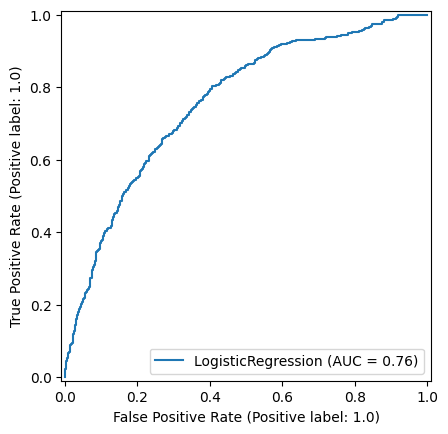

In [36]:
# 6. Curva ROC
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [47]:
# Coeficientes del modelo
coeficientes = model.coef_[0]
intercepto = model.intercept_[0]

# Crear un DataFrame con variables y coeficientes
coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": coeficientes
}).sort_values(by="Coeficiente", ascending=False)

print("Intercepto:", intercepto)
print(coef_df)

Intercepto: -0.4010102576892413
                                         Variable  Coeficiente
7            internet.InternetService_Fiber optic     0.410540
1                      customer.SeniorCitizen_1.0     0.396115
18                       internet.StreamingTV_Yes     0.333972
10                    internet.OnlineSecurity_Yes     0.318095
27                                customer.tenure     0.281050
3                         customer.Dependents_Yes     0.245516
20                   internet.StreamingMovies_Yes     0.240814
14                  internet.DeviceProtection_Yes     0.214223
6                         phone.MultipleLines_Yes     0.129785
24  account.PaymentMethod_Credit card (automatic)     0.128377
16                       internet.TechSupport_Yes     0.126194
12                      internet.OnlineBackup_Yes     0.122254
23                   account.PaperlessBilling_Yes     0.082903
28                        account.Charges.Monthly     0.055363
30                     

In [48]:
import numpy as np

# Coeficientes y odds ratio
coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": model.coef_[0]
})

coef_df["Odds Ratio"] = np.exp(coef_df["Coeficiente"])

# Ordenar por impacto absoluto (tanto positivo como negativo)
top_vars = coef_df.reindex(coef_df["Coeficiente"].abs().sort_values(ascending=False).index)

# Mostrar solo las 5 más influyentes
top5 = top_vars.head(5)

print("Top 5 variables más influyentes en el churn (Regresión Logística):")
print(top5)

Top 5 variables más influyentes en el churn (Regresión Logística):
                                Variable  Coeficiente  Odds Ratio
29                 account.Charges.Total    -0.944749    0.388777
22             account.Contract_Two year    -0.611977    0.542277
7   internet.InternetService_Fiber optic     0.410540    1.507632
1             customer.SeniorCitizen_1.0     0.396115    1.486041
18              internet.StreamingTV_Yes     0.333972    1.396505


### B. Random Forest

In [37]:
# 6. Evaluación del modelo
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.39      0.53      1549
        True       0.30      0.72      0.42       561

    accuracy                           0.48      2110
   macro avg       0.55      0.56      0.48      2110
weighted avg       0.66      0.48      0.50      2110

Confusion Matrix:
 [[609 940]
 [156 405]]
ROC AUC Score: 0.5759451500536831


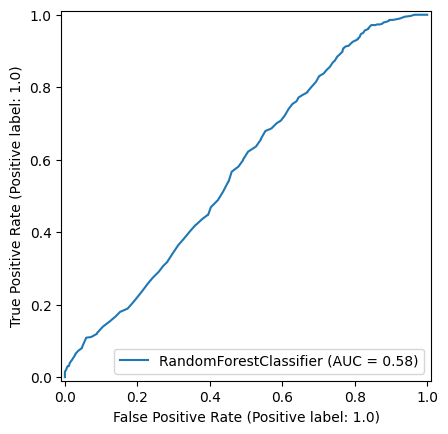

In [38]:
# 7. Curva ROC
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)

                                         Variable  Importancia
29                          account.Charges.Total     0.164557
30                                Cuentas_Diarias     0.157813
28                        account.Charges.Monthly     0.146129
27                                customer.tenure     0.124162
0                            customer.gender_Male     0.027273
13  internet.DeviceProtection_No internet service     0.026656
23                   account.PaperlessBilling_Yes     0.024613
2                            customer.Partner_Yes     0.021496
25         account.PaymentMethod_Electronic check     0.019358
1                      customer.SeniorCitizen_1.0     0.018596
11      internet.OnlineBackup_No internet service     0.018047
12                      internet.OnlineBackup_Yes     0.016361
10                    internet.OnlineSecurity_Yes     0.016351
3                         customer.Dependents_Yes     0.016185
26             account.PaymentMethod_Mailed check     0

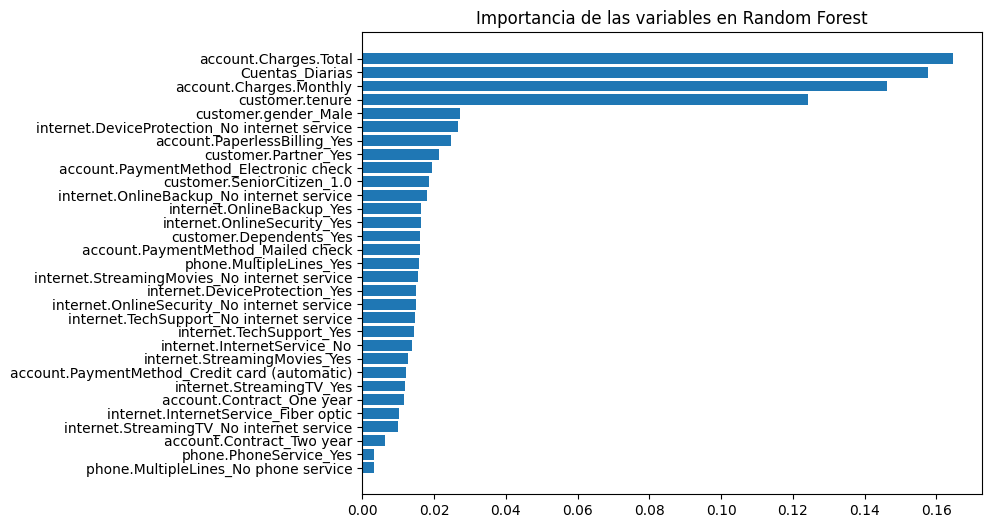

In [40]:
# Obtener importancias
importancias = rf_model.feature_importances_

# Crear un DataFrame ordenado
feat_importances = pd.DataFrame({
    "Variable": X_test.columns,
    "Importancia": importancias
}).sort_values(by="Importancia", ascending=False)

print(feat_importances)

# (Opcional) Visualizar en gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(feat_importances["Variable"], feat_importances["Importancia"])
plt.gca().invert_yaxis()
plt.title("Importancia de las variables en Random Forest")
plt.show()

# D.Interpretación y Conclusiones

#### A. Regresión Logística

El modelo captura bien los casos positivos (churn verdadero): 450 de 561 (80% recall), pero se equivoca bastante con la clase negativa: 641 falsos positivos, es decir, predice abandono (churn) en clientes que en realidad se quedan.

Con respecto a la curva ROC (0.76) el modelo tiene buena capacidad de discriminación entre churn y no churn.

Las variables más importantes serían:

* account.Charges.Total    (Coeficiente -0.944749)    
* account.Contract_Two year    (Coeficiente -0.611977)   
* internet.InternetService_Fiber optic     (Coeficiente 0.410540)    
* customer.SeniorCitizen_1.0     (Coeficiente 0.396115)    
* internet.StreamingTV_Yes     (Coeficiente 0.333972)    

#### B. Random Forest

El modelo tiende a marcar como verdadero (churn) incluso a muchos clientes que realmente no lo son.
Con respecto a la curva ROC (0.57) el poder de discriminación del modelo es muy bajo.

Las variables más importantes serían:

* account.Charges.Total     
* Cuentas_Diarias     
* account.Charges.Monthly     
* customer.tenure    

## Conclusión

De los dos modelos, el modelo regresión logística es el que mejor predice las personas que van a abandonar. A pesar de que tiene un riesgo de predecir falsos positivos (personas que se predicen como que se retiran, pero en realidad se quedan), esto sería mejor a largo plazo, que si dejaramos ir a clientes porque no los detectamos.  